In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector,plot_histogram
from qiskit_textbook.tools import array_to_latex

In [2]:
backend_s = Aer.get_backend('statevector_simulator')
backend_u = Aer.get_backend('unitary_simulator')

# Multiple Qubits and Entangled States

## Solutions

Please note that the circuits follow the qiskit ordering of qubits, where the topmost qubit in the circuit is written in the leftmost place.

## Quick Exercises 1.1
### 1. Write down the tensor product of the qubits:  

### **a)** $|0\rangle|1\rangle$   
$|0\rangle$ = $\begin{bmatrix}1\\0\end{bmatrix}$ and $|1\rangle$ = $\begin{bmatrix}0\\1\end{bmatrix}$

$|0\rangle|1\rangle = |0\rangle\otimes|1\rangle = \begin{bmatrix}1\begin{bmatrix}0\\1\end{bmatrix}\\0\begin{bmatrix}0\\1\end{bmatrix}\end{bmatrix} = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}$

An interesting thing to notice, which can possibly serve as a shortcut to verifying that your result is right, is that the position of the 1 is at the index '1' when indices start from 0. The first entry of the final state corresponds to $|00\rangle$, the second to $|01\rangle$ as we see above. The following should make this observation clear:

The subscripts in the following are the indices (beginning from 0) in binary: $\begin{bmatrix}0_{00}\\0_{01}\\0_{10}\\0_{11}\end{bmatrix}$

So if we have the state $|00\rangle$, we just put a 1 on the index corresponding to 00, like so: $|00\rangle = \begin{bmatrix}1_{00}\\0_{01}\\0_{10}\\0_{11}\end{bmatrix}$  
or, to make it absolutely evident, $|00\rangle = \begin{bmatrix}1_{|00\rangle}\\0_{|01\rangle}\\0_{|10\rangle}\\0_{|11\rangle}\end{bmatrix}$

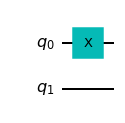

In [3]:
qc = QuantumCircuit(2)
qc.x(0) # NOT gate to convert default 0 state to 1
qc.draw('mpl')

<IPython.core.display.Math object>

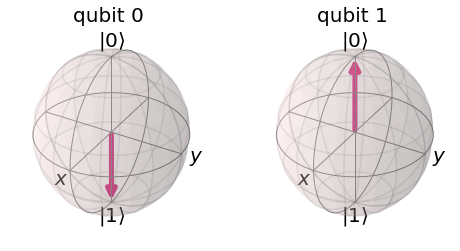

In [4]:
result_statevector = execute(qc,backend_s).result().get_statevector()
array_to_latex(result_statevector,pretext = "\\text{Result = }")
plot_bloch_multivector(result_statevector)

So what do we do if we have superpositions? You may already have figured it out. Let's look at the output of Hadamard gate for a single qubit initialized to $|0\rangle$.  

$\normalsize H|0\rangle = \large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1_{|0\rangle}\\1_{|1\rangle}\end{bmatrix} = \large\frac{1\cdot|0\rangle + 1\cdot |1\rangle}{\sqrt{2}}$  

Let us look at the remaining exercises and arrive at our solutions both ways: Regular matrix tensor product and our shortcut. Finally we can look at the output from the statevector simulator.  

### **b)** $|0\rangle|+\rangle$  
$|0\rangle$ = $\begin{bmatrix}1\\0\end{bmatrix}$ and $|+\rangle$ = $\large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1\\1\end{bmatrix}$

$|0\rangle|+\rangle = |0\rangle\otimes|+\rangle = \normalsize|0\rangle \otimes \frac{\large(|0\rangle + |1\rangle)}{\sqrt2} = \large\frac{(|00\rangle + |01\rangle)}{\sqrt2} = \normalsize \begin{bmatrix}1\begin{bmatrix}1\\1\end{bmatrix}\\0\begin{bmatrix}1\\1\end{bmatrix}\end{bmatrix} = \begin{bmatrix}1\\1\\0\\0\end{bmatrix} = \large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1_{|00\rangle}\\1_{|01\rangle}\\0_{|10\rangle}\\0_{|11\rangle}\end{bmatrix}$

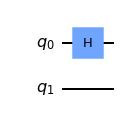

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl')

<IPython.core.display.Math object>

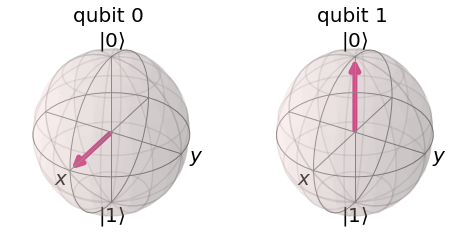

In [6]:
result_statevector = execute(qc,backend_s).result().get_statevector()
array_to_latex(result_statevector,pretext = "\\text{Result = }")
plot_bloch_multivector(result_statevector)

### **c)** $|+\rangle|1\rangle$  
$|+\rangle$ = $\large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1\\1\end{bmatrix}$ and $|1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$

$|+\rangle|1\rangle = |+\rangle\otimes|1\rangle = \large\frac{(|0\rangle + |1\rangle)}{\sqrt2} \normalsize\otimes|1\rangle = \large\frac{(|01\rangle + |11\rangle)}{\sqrt2} = \large\frac{1}{\sqrt2}\normalsize \begin{bmatrix}1\begin{bmatrix}0\\1\end{bmatrix}\\1\begin{bmatrix}0\\1\end{bmatrix}\end{bmatrix} = \large\frac{1}{\sqrt2}\begin{bmatrix}0\\1\\0\\1\end{bmatrix} = \large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}0_{|00\rangle}\\1_{|01\rangle}\\0_{|10\rangle}\\1_{|11\rangle}\end{bmatrix}$

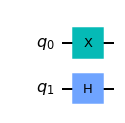

In [7]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.draw('mpl')

<IPython.core.display.Math object>

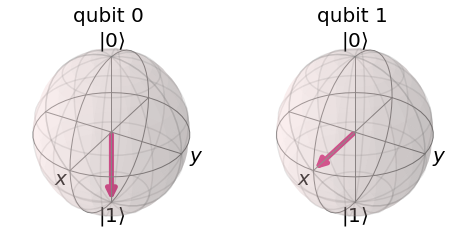

In [8]:
result_statevector = execute(qc,backend_s).result().get_statevector()
array_to_latex(result_statevector,pretext = "\\text{Result = }")
plot_bloch_multivector(result_statevector)

### **d)** $|-\rangle|+\rangle$  
$|-\rangle = \large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1\\-1\end{bmatrix}$ and $|+\rangle$ = $\large\frac{1}{\sqrt2}\normalsize\begin{bmatrix}1\\1\end{bmatrix}$

$|-\rangle|+\rangle = |-\rangle\otimes|+\rangle = \large\frac{(|0\rangle - |1\rangle)}{\sqrt2}\large\otimes\frac{(|0\rangle + |1\rangle)}{\sqrt2} = \large\frac{(|00\rangle + |01\rangle - |10\rangle - |11\rangle)}{2} = \large\frac{1}{2}\normalsize \begin{bmatrix}1\begin{bmatrix}1\\1\end{bmatrix}\\-1\begin{bmatrix}1\\1\end{bmatrix}\end{bmatrix} = \large\frac{1}{2}\begin{bmatrix}1\\1\\-1\\-1\end{bmatrix} = \large\frac{1}{2}\normalsize\begin{bmatrix}1_{|00\rangle}\\1_{|01\rangle}\\-1_{|10\rangle}\\-1_{|11\rangle}\end{bmatrix}$

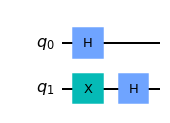

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

<IPython.core.display.Math object>

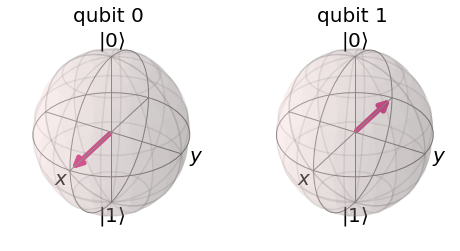

In [10]:
result_statevector = execute(qc,backend_s).result().get_statevector()
array_to_latex(result_statevector,pretext = "\\text{Result = }")
plot_bloch_multivector(result_statevector)

### 2. Write the state $|\psi\rangle = \frac{1}{\sqrt2}|00\rangle + \frac{i}{\sqrt2}|01\rangle$ as two separate qubits.

We can see that the first qubit(rightmost) is 0 in both the terms of $|\psi\rangle$, hence that can be "taken common" from the above and written as the tensor product with the other qubit in the following way:  

$\large|\psi\rangle = \frac{1}{\sqrt2}|00\rangle + \frac{i}{\sqrt2}|01\rangle = |0\rangle\otimes(\frac{1}{\sqrt2}|0\rangle + \frac{i}{\sqrt2}|1\rangle)$

$\Large--------------------------------------$

## Quick Exercises 2.1
### 1. Calculate the single qubit unitary $(U)$ created by the sequence of gates: $U = XZH$. Use Qiskit's unitary simulator to check your results.

The question is pretty straightforward. For reference, the following are the gates' matrix representations:

#### $X = \begin{bmatrix}0&1\\1&0\end{bmatrix}$ , $Z = \begin{bmatrix}1&0\\0&-1\end{bmatrix}$ and $H = \large\frac{1}{\sqrt2}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$

Simple multiplication of all three gives us:

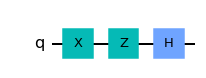

In [11]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)

qc.draw('mpl')

In [12]:
result_unitary = execute(qc,backend_u).result().get_unitary()
array_to_latex(result_unitary,pretext = "\\text{U = XZH = }")

<IPython.core.display.Math object>

### 2. Try changing the gates in the circuit above. Calculate their tensor product, and then check your answer using the unitary simulator.

Circuit:

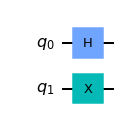

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

qc.draw('mpl')

In [14]:
array_to_latex(execute(qc,backend_u).result().get_unitary())

<IPython.core.display.Math object>

which is equal to $\begin{bmatrix}0&H\\H&0\end{bmatrix} = X\otimes H$

Let us remove the X gate from $\normalsize q_1$

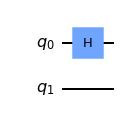

In [15]:
qc = QuantumCircuit(2)
qc.h(0)

qc.draw('mpl')

In [16]:
array_to_latex(execute(qc,backend_u).result().get_unitary())

<IPython.core.display.Math object>

which is equal to $\begin{bmatrix}H&0\\0&H\end{bmatrix} = I\otimes H$

As a last alteration in this notebook, let's try new gates:

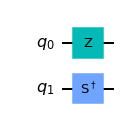

In [17]:
qc = QuantumCircuit(2)
qc.sdg(1)
qc.z(0)
qc.draw('mpl')

In [18]:
array_to_latex(execute(qc,backend_u).result().get_unitary())

<IPython.core.display.Math object>

which is equal to $\begin{bmatrix}Z&0\\0&-i\cdot Z\end{bmatrix} = S{^\dagger}\otimes Z$

$\Large--------------------------------------$

## Quick Exercises 3.3
### 1. Create a quantum circuit that produces the Bell state: $\frac{1}{\sqrt2}(|01\rangle+|10\rangle).$ Use the statevector simulator to verify your result.

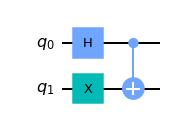

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)

qc.draw('mpl')

<IPython.core.display.Math object>

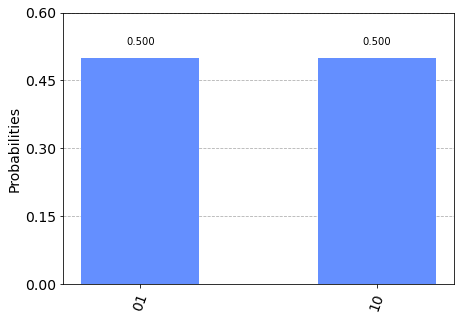

In [20]:
entangled = execute(qc,backend_s).result()
entangled_statevector = entangled.get_statevector()
entangled_counts = entangled.get_counts()
array_to_latex(entangled_statevector, pretext = "\\text{Statevector = }")
plot_histogram(entangled_counts)

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}